In [23]:
import numpy as np
#import matplotlib as plt
import matplotlib.pyplot as plt
import pandas as pd
import random
import os
from tabulate import tabulate
#np.set_printoptions(threshold=np.nan)
#%matplotlib inline


# Variables

die_roll = 0
die_type = 6
die_payout = die_type
player_bet = 0
player_pick = 0
player_win = 0
player_purse = 100
round = 0
counter = 0


# Keeping track and initialize lists

#turn_list.clear()
#purse_list.clear()
#bet_list.clear()
#win_loss_list.clear()
#rolled_number_list.clear()
#picked_number_list.clear()

round_list = [0]
turn_list = [0]
purse_list =[100]
bet_list = [0]
win_loss_list = [0]
rolled_number_list = [0]
picked_number_list = [0]

track = {'Round':round_list,'Turns':turn_list,'Purse':purse_list, 'Bet':bet_list, 'Win_Loss':win_loss_list, 'Rolled_Number':rolled_number_list,
'Picked_Number':picked_number_list}

for j in range(100000):
    #np.random.seed(11111111)
    round = round +1
    counter = 0
    player_purse = 100

    while player_purse > 0:
        round_list.append(round)
        counter = counter +1
        turn_list.append(counter)
        die_roll = random.randint(1,6)
        rolled_number_list.append(die_roll)
        player_bet = random.randint(0,player_purse)
        bet_list.append(player_bet)
        player_pick = random.randint(1,6)
        picked_number_list.append(player_pick)
        if player_pick == die_roll:
            player_win = player_bet * die_payout
        else:
            player_win = -1 * player_bet
        win_loss_list.append(player_win)
        player_purse = player_purse + player_win
        purse_list.append(player_purse)
        if player_purse == 0:
            break
#Tabular Results 
header = track.keys()
#print(tabulate(track, headers=['Turn', 'Purse', 'Bet', 'Win/Loss', 'Rolled_Number', 'Picked_Number']))
#print(tabulate(track, headers=header))

df = pd.DataFrame.from_dict(track)
#print(df)

round_high = df.groupby('Round')['Purse'].max()
tops = round_high.max()
high_round = round_high[round_high == tops].index[0]
newdf1 = df.loc[:,["Round","Purse","Win_Loss","Turns"]]
newdf2 = newdf1.loc[newdf1["Round"] == high_round]



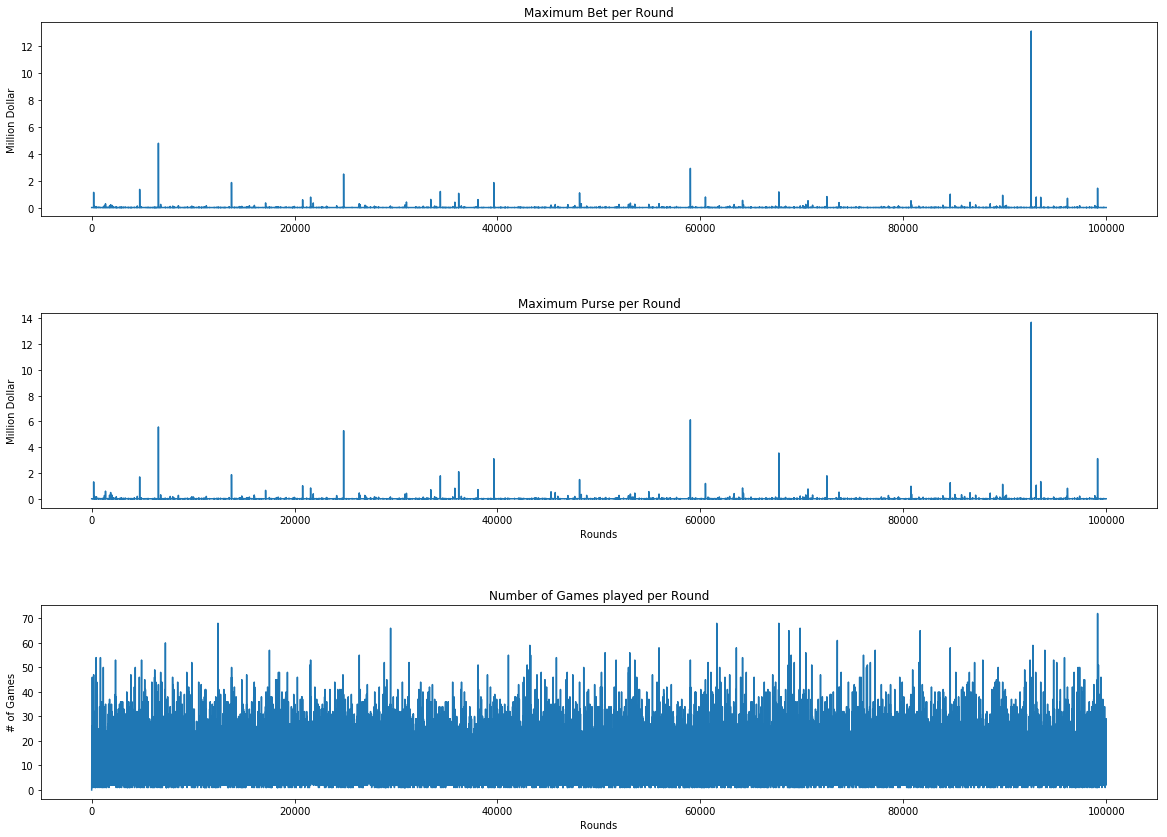

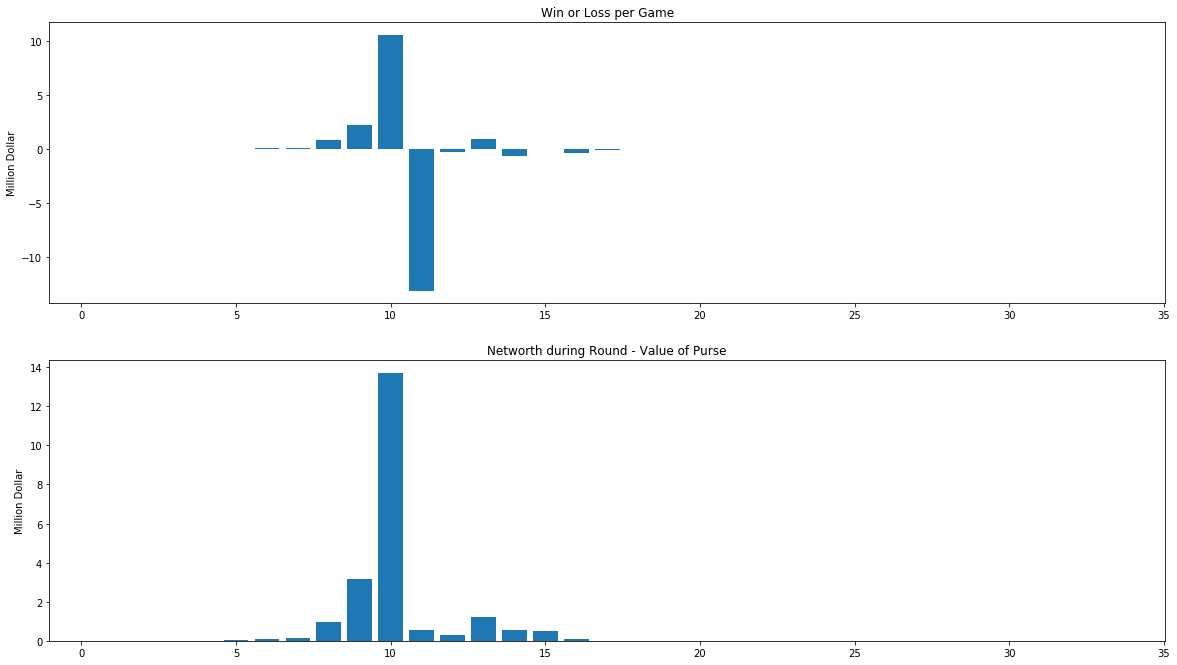

In [24]:
x1 = df["Round"].unique()
x2 = list(newdf2["Turns"])

y1 = df.groupby("Round")["Bet"].max() / 1000000
y2 = df.groupby("Round")["Purse"].max() / 1000000
y3 = df.groupby("Round")["Turns"].max()
y4 = newdf2["Win_Loss"] / 1000000
y5 = newdf2["Purse"] / 1000000


f = plt.figure(figsize=(20,25))
plt.subplots_adjust(hspace=0.5)
#y1.ticklabel_format(style='plain')

plt.subplot(5,1,1)
plt.plot(x1,y1)
plt.title("Maximum Bet per Round")
plt.ylabel("Million Dollar")
plt.ticklabel_format(style='plain')


plt.subplot(5,1,2)
plt.plot(x1,y2)
plt.title("Maximum Purse per Round")
plt.ylabel("Million Dollar")
plt.xlabel("Rounds")
plt.ticklabel_format(style='plain')


plt.subplot(5,1,3)
plt.plot(x1,y3)
plt.title("Number of Games played per Round")
plt.ylabel("# of Games")
plt.xlabel("Rounds")

f = plt.figure(figsize=(20,30))

plt.subplot(5,1,4)
plt.bar(x2,y4)
plt.title("Win or Loss per Game")
plt.ylabel("Million Dollar")
plt.ticklabel_format(style='plain')


plt.subplot(5,1,5)
plt.bar(x2,y5)
plt.title("Networth during Round - Value of Purse")
plt.ylabel("Million Dollar")
plt.ticklabel_format(style='plain')



plt.show()
